## Part 2: Communities

#### In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). 
#### The dataset is available in NetworkX, by calling the function karate_club_graph

---------

##### 1. Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute).

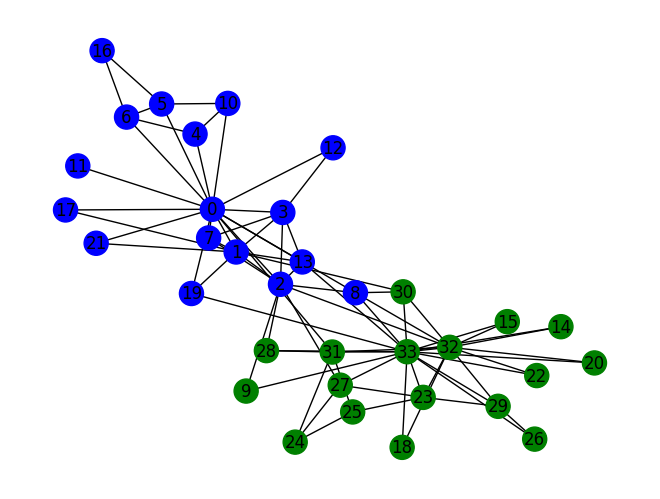

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

club = nx.get_node_attributes(G, "club")

color_map = []
for node in G.nodes():
    if club[node] == "Mr. Hi":
        color_map.append("blue")
    else:
        color_map.append("green")

MrHiGroup = []
OfficerGroup = []
for i in range(len(color_map)):
    if club[i] == "Mr. Hi":
        MrHiGroup.append(i)
    else:
        OfficerGroup.append(i)

nx.draw(G, with_labels=True, node_color=color_map)
plt.show()


--------
##### 2. Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). The function takes in a networkX Graph and a partitioning as inputs and return the modularity.

In [2]:
def modularity(G, communities):
    m = G.number_of_edges()
    q = 0.0
    for c in communities:
        lc = G.subgraph(c).number_of_edges()
        kc = sum(G.degree(n) for n in c)
        q += lc/m - (kc/(2*m))**2
    return q

------

##### 3. Explain in your own words the concept of modularity:

Modularity is a number that determines how well some communities (partitions) is distributed in a graph (communities). The higher the modularity, the better the communities have been split up. If the modularity is 0, then there is only 1 community. If modularity is negative, then all nodes are their own community.

-------
##### 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a node attribute, called "club".

In [3]:
modularity_from_current_communities = modularity(G, [OfficerGroup, MrHiGroup])
modularity_from_current_communities


0.3582347140039447

-------

##### 5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from. To do so, we will implement the double edge swap algorithm. The double edge swap algorithm is quite old... it was implemented in 1891 (!) by Danish mathematician Julius Petersen(https://en.wikipedia.org/wiki/Julius_Petersen). Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is how the algorithm works.

    a. Create an identical copy of your original network.
    b. Consider two edges in your new network (u,v) and (x,y), such that u!=v and v!=x.
    c. If none of edges (u,y) and (x,v) exists already, add them to the network and remove edges (u,v) and (x,y).
    Repeat steps b. and c. to achieve at least N swaps (I suggest N to be larger than the number of edges).

##### N is chosen to simply just be higher than number of edges. This could also have been even higher, but times 2 is reasonable

In [4]:
N = G.number_of_edges()*2

In [5]:
import random

def double_edge_swap_algo(G_original, N):
    G = G_original.copy()
    for i in range(N):
        u, v = random.choice(list(G.edges()))
        x, y = random.choice(list(G.edges()))

        if (u != x) and (v != y) and (not G.has_edge(u, y)) and (not G.has_edge(x, v)):
            # perform the double edge swap
            G.remove_edges_from([(u, v), (x, y)])
            G.add_edges_from([(u, y), (x, v)])
    
    return G


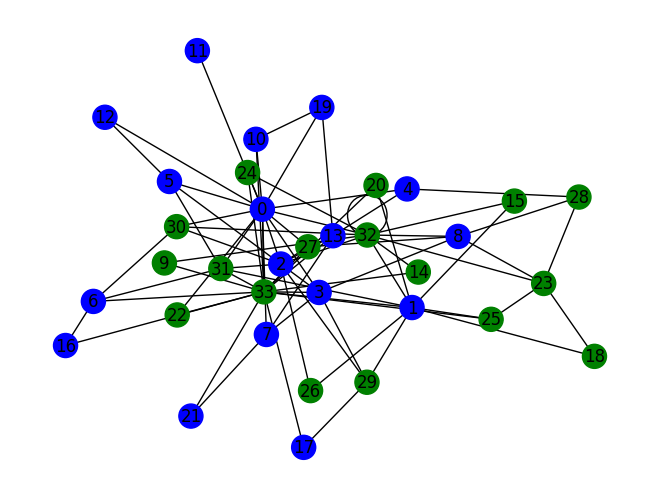

In [6]:
G_double_edge_swap = double_edge_swap_algo(G, N)
nx.draw(G_double_edge_swap, with_labels=True, node_color=color_map)
plt.show()

-------

##### 6. Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same. The two following lists should be the same:

In [7]:
lst_old = [d for n, d in G.degree()]
lst_new = [d for n, d in G_double_edge_swap.degree()]

print("Original degree sequence: ", lst_old)
print("New degree sequence: ", lst_new)
print("Number of errors: ", sum([True for i in range(len(lst_old)) if lst_old[i] != lst_new[i]]))

Original degree sequence:  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
New degree sequence:  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Number of errors:  0


In [8]:
# new_modularity for double edge swap
modularity(G_double_edge_swap, [OfficerGroup, MrHiGroup])

-0.0007396449704142605

-----
#### 7, 8 and 9. is all solved in this one function: is_significantly_dif_from_zero

##### 7. Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.
##### 8. Compute the average and standard deviation of the modularity for the random network.
##### 9. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

In [15]:
# function to find if modularity is significantly different from 0

import numpy as np

number_of_iterations = 1000
coms = [OfficerGroup, MrHiGroup]

def plot_density(modularities, value):
    plt.hist(modularities, bins=50, alpha=0.5, density=True)
    plt.axvline(x=value, color='r')

    plt.xlabel('Modularity')
    plt.ylabel('Density')
    plt.title('Distribution of Random Modularities with Actual Modularity')
    plt.show()
    

def is_significantly_dif_from_zero(G, value):

    print("current modularity = ", value)

    modularities = []
    for i in range(number_of_iterations):
        current_double_edge_swap = double_edge_swap_algo(G, N)
        current_modularity = modularity(current_double_edge_swap, coms)
        modularities.append(current_modularity)
    
    mean = np.mean(modularities)
    std = np.std(modularities)

    print("mean: ", mean)
    print("std: ", std)

    plot_density(modularities, value)

    if value < mean-2*std or value > mean+2*std:
        print("Value is significantly different")
    else: 
        print("Value is not significantly different")



current modularity =  0.3582347140039447
mean:  -0.0013505807795268978
std:  0.047414090879488426


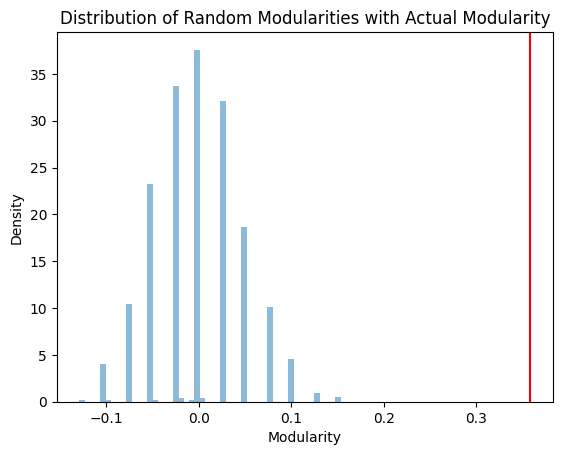

Value is significantly different


In [16]:
is_significantly_dif_from_zero(G, modularity_from_current_communities)

-----
##### 10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

##### The high modularity score indicates that the partition is better than a random partition, but there is no way of knowing how good or if it is the best. We would argue that this partition is pretty decent, but certainly not the best as we will soon see.
##### Performing this randomization experiment makes it clear whether or not this partition is significantly different from a random partitioning. It therefore makes it pretty obvious that this club split is much better than a random partitioning.
##### It is pretty important to preserve the nodes degree simply because degree distribution can have a pretty large effect on modularity, and we want to make sure that any observed differences in modularity is not due to difference in degree distribution. This allows us to test hypothesis about the structure and behaviour of the network

-----
##### 11. Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [11]:
import community

partition = community.best_partition(G)
partitions = {}
for i in range(len(partition)):
    group = list(partition.values())[i]
    if group in partitions.keys():
        partitions[group] += [i]
    else:
        partitions[group] = [i]

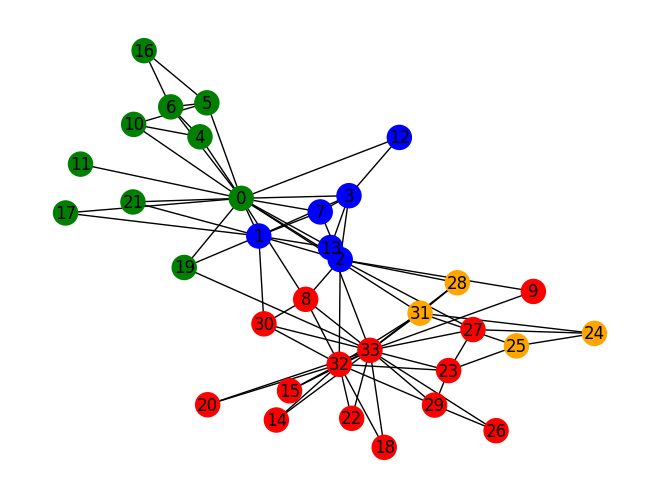

In [14]:
louvain_partitions = list(partitions.values())
louvain_colors = []

for i in range(len(partition)):
    if i in louvain_partitions[0]:
        louvain_colors.append("green")
    if i in louvain_partitions[1]:
        louvain_colors.append("blue")
    if i in louvain_partitions[2]:
        louvain_colors.append("red")
    if i in louvain_partitions[3]:
        louvain_colors.append("orange")

nx.draw(G, with_labels=True, node_color=louvain_colors)
plt.show()


current modularity =  0.39045036160420765
mean:  -0.002291191242989509
std:  0.04662910534744287


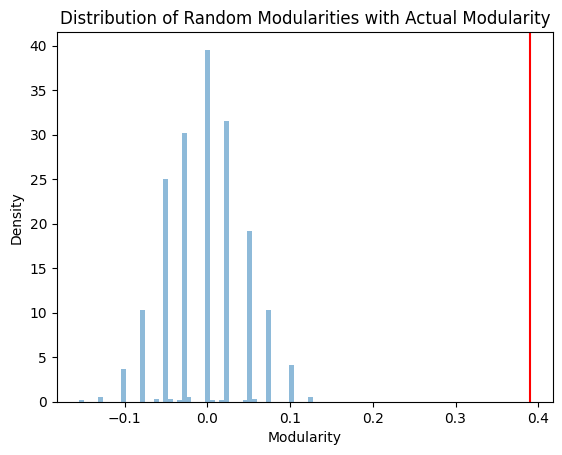

Value is significantly different


In [17]:
louvain_modularity = modularity(G, louvain_partitions)
is_significantly_dif_from_zero(G, louvain_modularity)

In [19]:
print("Louvain modularity: ", louvain_modularity)
print("Original modularity: ", modularity_from_current_communities)
print("Is louvain higher than original? ", louvain_modularity > modularity_from_current_communities)
print("Difference: ", louvain_modularity - modularity_from_current_communities)

Louvain modularity:  0.39045036160420765
Original modularity:  0.3582347140039447
Is louvain higher than original?  True
Difference:  0.032215647600262964


##### Answering the questions: Is it higher or lower than what you found above for the club split? What does this comparison reveal?
##### Yes, the Louvain modularity is a bit higher than the original modularity. This comparison simply just reveals that the louvain algorithm found a better partitioning (group split) than the club split. This means that there are a better way of splitting the data to gain a higher modularity than the club split

-----
##### 12. Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [63]:
# number of communities from louvain is 4
D = np.ndarray((2, 4))
D

array([[0., 0., 1., 0.],
       [0., 1., 1., 1.]])

Text(0.5, 1.0, 'Alike in louvain and club group')

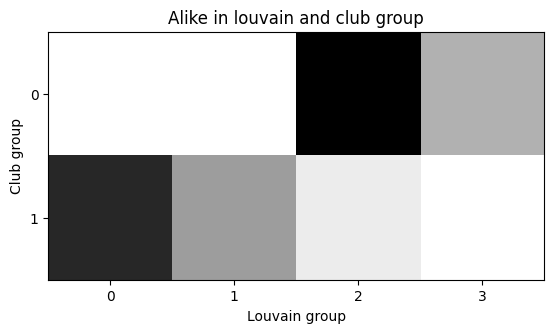

In [70]:
club_split = [OfficerGroup, MrHiGroup]

for i in range(len(club_split)):
    current_club = club_split[i]
    for j in range(len(louvain_partitions)):
        current_partition = louvain_partitions[j]
        alike = sum([True for x in range(len(current_partition)) if current_partition[x] in current_club])
        D[i, j] = alike

plt.imshow(D, cmap='binary')
plt.xlabel("Louvain group")
plt.xticks([0, 1, 2, 3])
plt.ylabel("Club group")
plt.yticks([0, 1])
plt.title("Alike in louvain and club group")



It seems that the louvain groups have split each club into two smaller groups, with one bigger and one smaller group. It seems to be fit the club split partitioning pretty well, as every club is split into two groups. Louvain group two is the only group, which has nodes from both clubs.